In [2]:
import xarray as xr
import pandas as pd
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

In [3]:
wind  = xr.open_dataset("24_extreme_wind_speed_days-projections-yearly-rcp_4_5-wrf381p-ipsl_cm5a_mr-r1i1p1-grid-v1.0.nc", engine="netcdf4")
precipitation = xr.open_dataset("15_frequency_of_extreme_precipitation-projections-yearly-rcp_4_5-wrf381p-ipsl_cm5a_mr-r1i1p1-grid-v1.0.nc", engine="netcdf4")

In [4]:
wind= wind.to_dataframe().reset_index()
precipitation = precipitation.to_dataframe().reset_index()

In [5]:
wind

,time,lat,lon,height,data
0,1951-01-01,26.5,-22.00,10.0,NaT
1,1951-01-01,26.5,-21.75,10.0,NaT
2,1951-01-01,26.5,-21.50,10.0,NaT
3,1951-01-01,26.5,-21.25,10.0,NaT
4,1951-01-01,26.5,-21.00,10.0,NaT
...,...,...,...,...,...
7520245,2100-01-01,72.5,44.50,10.0,NaT
7520246,2100-01-01,72.5,44.75,10.0,NaT
7520247,2100-01-01,72.5,45.00,10.0,NaT
7520248,2100-01-01,72.5,45.25,10.0,NaT


In [6]:
wind= wind.drop('height', axis=1)

In [6]:
wind.dtypes

time     datetime64[ns]
lat             float64
lon             float64
data    timedelta64[ns]
dtype: object

In [7]:
wind['year'] = wind['time'].dt.year

In [8]:
wind

,time,lat,lon,data,year
0,1951-01-01,26.5,-22.00,NaT,1951
1,1951-01-01,26.5,-21.75,NaT,1951
2,1951-01-01,26.5,-21.50,NaT,1951
3,1951-01-01,26.5,-21.25,NaT,1951
4,1951-01-01,26.5,-21.00,NaT,1951
...,...,...,...,...,...
7520245,2100-01-01,72.5,44.50,NaT,2100
7520246,2100-01-01,72.5,44.75,NaT,2100
7520247,2100-01-01,72.5,45.00,NaT,2100
7520248,2100-01-01,72.5,45.25,NaT,2100


In [8]:
wind= wind[(wind['year'] >= 2025) & (wind['year'] <= 2035)]


In [10]:
wind.shape

(551485, 5)

In [ ]:
wind['days'] = wind['data'].dt.days

In [10]:
filtered_data = wind[(wind['time'] == '2026-01-01') & (wind['lat'] == 50) & (wind['lon'] == 10.25)]
filtered_data

,time,lat,lon,data,year,days
3785728,2026-01-01,50.0,10.25,11 days,2026,11.0


In [11]:
value_counts_wind = wind['days'].value_counts(dropna=True)

print(value_counts_wind)

days
6.0     57630
5.0     55407
7.0     55245
8.0     50375
4.0     48593
        ...  
75.0        1
52.0        1
77.0        1
49.0        1
54.0        1
Name: count, Length: 64, dtype: int64


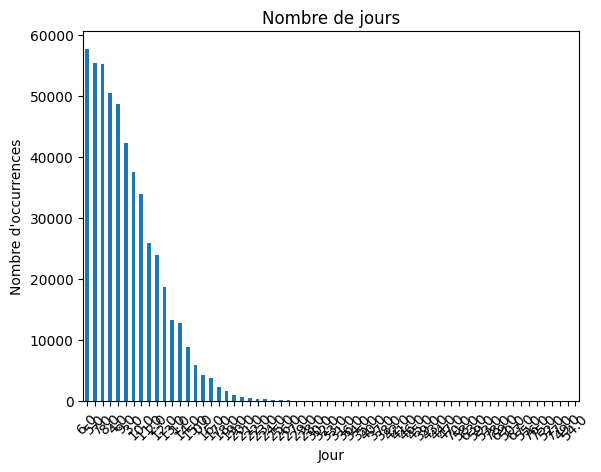

In [12]:
value_counts_wind.plot(kind='bar')

# Ajouter un titre et des labels
plt.title('Nombre de jours')
plt.xlabel('Jour')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=45)
plt.show()

In [13]:
# Calcul des percentiles (33% et 66%) pour diviser en 3 groupes
percentiles = wind['days'].quantile([0.33, 0.66])

# Ajout de la colonne "risk" en fonction des percentiles
def assign_risk(value):
    if pd.isna(value): 
        return '0' 
    if value <= percentiles[0.33]:
        return '1'  # Risk faible pour le 1er tiers (33%)
    elif value <= percentiles[0.66]:
        return '2'  # Risk modéré pour le 2ème tiers (66%)
    else:
        return '3'  # Risk élevé pour les valeurs supérieures au 2ème tiers (66%)

# Appliquer la fonction assign_risk à chaque valeur de la colonne "days"
wind['risk'] = wind['days'].apply(assign_risk)

print(wind)


              time   lat    lon data  year  days risk
3709990 2025-01-01  26.5 -22.00  NaT  2025   NaN    0
3709991 2025-01-01  26.5 -21.75  NaT  2025   NaN    0
3709992 2025-01-01  26.5 -21.50  NaT  2025   NaN    0
3709993 2025-01-01  26.5 -21.25  NaT  2025   NaN    0
3709994 2025-01-01  26.5 -21.00  NaT  2025   NaN    0
...            ...   ...    ...  ...   ...   ...  ...
4261470 2035-01-01  72.5  44.50  NaT  2035   NaN    0
4261471 2035-01-01  72.5  44.75  NaT  2035   NaN    0
4261472 2035-01-01  72.5  45.00  NaT  2035   NaN    0
4261473 2035-01-01  72.5  45.25  NaT  2035   NaN    0
4261474 2035-01-01  72.5  45.50  NaT  2035   NaN    0

[551485 rows x 7 columns]


In [14]:
wind['risk'].describe()

count     551485
unique         4
top            1
freq      182487
Name: risk, dtype: object

In [28]:
filtered_data = wind[(wind['time'] == '2028-01-01') & (wind['lat'] ==36.75 ) & (wind['lon'] == 10.25)]
filtered_data

,time,lat,lon,data,year,days,risk
3871635,2028-01-01,36.75,10.25,6 days,2028,6.0,2


In [17]:
wind.to_csv("wind.csv", index=False)

In [18]:
precipitation

,time,lat,lon,data
0,1951-01-01,26.5,-22.00,NaT
1,1951-01-01,26.5,-21.75,NaT
2,1951-01-01,26.5,-21.50,NaT
3,1951-01-01,26.5,-21.25,NaT
4,1951-01-01,26.5,-21.00,NaT
...,...,...,...,...
7520245,2100-01-01,72.5,44.50,NaT
7520246,2100-01-01,72.5,44.75,NaT
7520247,2100-01-01,72.5,45.00,NaT
7520248,2100-01-01,72.5,45.25,NaT


In [19]:
precipitation.dtypes

time     datetime64[ns]
lat             float64
lon             float64
data    timedelta64[ns]
dtype: object

In [20]:
precipitation['year'] = precipitation['time'].dt.year

In [ ]:
precipitation = precipitation[(precipitation['year'] >= 2025) & (precipitation['year'] <= 2035)]

In [22]:
precipitation['days'] = precipitation['data'].dt.days


/tmp/ipykernel_145510/4125743944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precipitation['days'] = precipitation['data'].dt.days


In [24]:
filtered_data = precipitation[(precipitation['time'] == '2028-01-01') & (precipitation['lat'] ==36.75 ) & (precipitation['lon'] == 10.25)]
filtered_data

,time,lat,lon,data,year,days
3871635,2028-01-01,36.75,10.25,10 days,2028,10.0


In [25]:
value_counts_precipitation = precipitation['days'].value_counts(dropna=True)

print(value_counts_precipitation)

days
0.0     40486
7.0     37931
6.0     36985
8.0     36435
5.0     34448
9.0     34420
4.0     31606
10.0    30810
3.0     28268
1.0     28089
11.0    26621
2.0     26082
12.0    22905
13.0    19804
14.0    16155
15.0    13126
16.0    10649
17.0     8238
18.0     6403
19.0     4729
20.0     3404
21.0     2491
22.0     1758
23.0     1284
24.0      993
25.0      648
26.0      402
27.0      290
28.0      201
29.0      118
30.0       80
31.0       42
32.0       27
33.0       24
34.0       13
35.0        9
36.0        7
37.0        4
38.0        4
Name: count, dtype: int64


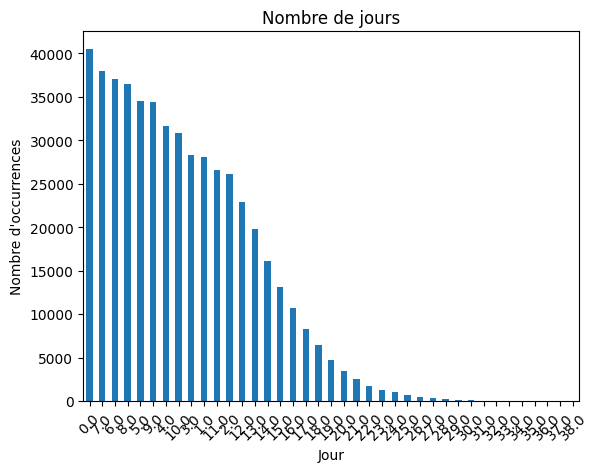

In [26]:
value_counts_precipitation.plot(kind='bar')

# Ajouter un titre et des labels
plt.title('Nombre de jours')
plt.xlabel('Jour')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=45)
plt.show()

In [29]:
# Calcul des percentiles (33% et 66%) pour diviser en 3 groupes
percentiles = precipitation['days'].quantile([0.33, 0.66])

# Ajout de la colonne "risk" en fonction des percentiles
def assign_risk(value):
    if pd.isna(value): 
        return 'O' 
    if value <= percentiles[0.33]:
        return '1'  # Risk faible pour le 1er tiers (33%)
    elif value <= percentiles[0.66]:
        return '2'  # Risk modéré pour le 2ème tiers (66%)
    else:
        return '3'  # Risk élevé pour les valeurs supérieures au 2ème tiers (66%)

# Appliquer la fonction assign_risk à chaque valeur de la colonne "days"
precipitation['risk'] = precipitation['days'].apply(assign_risk)

print(precipitation)

              time   lat    lon data  year  days risk
3709990 2025-01-01  26.5 -22.00  NaT  2025   NaN    O
3709991 2025-01-01  26.5 -21.75  NaT  2025   NaN    O
3709992 2025-01-01  26.5 -21.50  NaT  2025   NaN    O
3709993 2025-01-01  26.5 -21.25  NaT  2025   NaN    O
3709994 2025-01-01  26.5 -21.00  NaT  2025   NaN    O
...            ...   ...    ...  ...   ...   ...  ...
4261470 2035-01-01  72.5  44.50  NaT  2035   NaN    O
4261471 2035-01-01  72.5  44.75  NaT  2035   NaN    O
4261472 2035-01-01  72.5  45.00  NaT  2035   NaN    O
4261473 2035-01-01  72.5  45.25  NaT  2035   NaN    O
4261474 2035-01-01  72.5  45.50  NaT  2035   NaN    O

[551485 rows x 7 columns]


/tmp/ipykernel_145510/123744152.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precipitation['risk'] = precipitation['days'].apply(assign_risk)


In [30]:
precipitation.to_csv("precipitaion.csv", index=False)
